In [89]:
import requests
import re
import time
import os
import pandas as pd
import pickle

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


import diagnostic_plots
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

In [55]:
#save to pick for efficiency



filename_berkely = '/Users/xzhou/github/project_files/project_luther/professor_data_berkely.pkl' #3986 records
filename_nyu = '/Users/xzhou/github/project_files/project_luther/professor_data_nyu.pkl' #5607 records
filename_uf = '/Users/xzhou/github/project_files/project_luther/professor_data_uf.pkl' #5307 records

df_berkely=pd.read_pickle(filename_berkely)
df_nyu=pd.read_pickle(filename_nyu)
df_uf=pd.read_pickle(filename_uf)

In [56]:
print(df_berkely.shape)
print(df_nyu.shape)
print(df_uf.shape)

(3986, 24)
(5607, 24)
(5306, 24)


In [57]:
dfs=pd.concat([df_berkely, df_nyu, df_uf])
dfs.shape

(14899, 24)

In [58]:
#check for null values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14899 entries, 0 to 5305
Data columns (total 24 columns):
Name                           14899 non-null object
Rating                         14899 non-null float64
Level of difficulty            14899 non-null float64
Total reviews                  14899 non-null int64
Accessible outside class       14899 non-null float64
Amazing lectures               14899 non-null float64
Beware of pop quizzes          14899 non-null float64
Caring                         14899 non-null float64
Clear grading criteria         14899 non-null float64
Extra credit                   14899 non-null float64
Get ready to read              14899 non-null float64
Gives good feedback            14899 non-null float64
Graded by few things           14899 non-null float64
Group projects                 14899 non-null float64
Hilarious                      14899 non-null float64
Inspirational                  14899 non-null float64
Lecture heavy                  

In [59]:
dfs.columns

Index(['Name', 'Rating', 'Level of difficulty', 'Total reviews',
       'Accessible outside class', 'Amazing lectures', 'Beware of pop quizzes',
       'Caring', 'Clear grading criteria', 'Extra credit', 'Get ready to read',
       'Gives good feedback', 'Graded by few things', 'Group projects',
       'Hilarious', 'Inspirational', 'Lecture heavy', 'Lots of homework',
       'Participation matters', 'Respected', 'Skip class? you won't pass.',
       'So many papers', 'Test heavy', 'Tough grader'],
      dtype='object')

In [60]:
dfs.head()

,Name,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
0,Jerry Sanders,2.7,3.4,75,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
1,Chris Dolder,4.8,3.9,9,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.50,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
2,Bob Calonico,4.7,1.6,29,0.05,0.00,0.0,0.26,0.00,0.00,...,0.26,0.32,0.00,0.0,0.00,0.11,0.00,0.0,0.0,0.00
3,Zack Powell,2.1,3.0,15,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
4,Mary Kelsey,4.6,1.6,63,0.04,0.04,0.0,0.12,0.08,0.27,...,0.00,0.08,0.04,0.0,0.08,0.12,0.04,0.0,0.0,0.04


In [61]:
# noted records with no professor name
dfs.tail()

,Name,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
5301,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5302,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5303,Tina D'Allesandro,4.0,3.0,1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
5304,Kay Leary,5.0,3.0,1,0.0,0.0,0.0,0.0,0.33,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5305,Lisa Domenico,4.0,5.0,1,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0


In [62]:
# check how many recoard are associated with no professor name
dfs[dfs['Name']=='']

,Name,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
244,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
674,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,,0.0,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
dfs_smaller=dfs[dfs.Name!=""]
dfs_smaller.shape

(13238, 24)

In [64]:
dfs_smaller.describe()

,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,Get ready to read,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
count,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.00000,13238.000000,13238.000000,13238.00000,...,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000
mean,3.797401,2.901148,9.975525,0.018514,0.029507,0.004915,0.04185,0.023120,0.009057,0.03840,...,0.022012,0.029074,0.024260,0.023156,0.032918,0.037072,0.027290,0.006304,0.007747,0.040504
std,1.033064,0.909378,18.740137,0.063042,0.084010,0.036801,0.10303,0.079273,0.048266,0.10168,...,0.074994,0.082168,0.085829,0.078951,0.092945,0.093580,0.082422,0.039248,0.042733,0.113506
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000,2.300000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,3.500000,11.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,507.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000


In [65]:
a=[[1,2,3],[4,5,6]]
df_test=pd.DataFrame(a)
df_test['sum']=df_test.sum(axis=1)
df_test

,0,1,2,sum
0,1,2,3,6
1,4,5,6,15


In [67]:
dfs_name_dropped=dfs_smaller.drop(['Name'], axis=1)
dfs_name_dropped.head()

,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,Get ready to read,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
0,2.7,3.4,75,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
1,4.8,3.9,9,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.50,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
2,4.7,1.6,29,0.05,0.00,0.0,0.26,0.00,0.00,0.00,...,0.26,0.32,0.00,0.0,0.00,0.11,0.00,0.0,0.0,0.00
3,2.1,3.0,15,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
4,4.6,1.6,63,0.04,0.04,0.0,0.12,0.08,0.27,0.04,...,0.00,0.08,0.04,0.0,0.08,0.12,0.04,0.0,0.0,0.04


In [68]:
dfs_smaller.insert(4,'Total score for Tags', dfs_smaller.sum(axis=1)-dfs_smaller['Rating']-dfs_smaller['Level of difficulty']-dfs_smaller['Total reviews'])


In [69]:
dfs_smaller.shape

(13238, 25)

In [71]:

dfs_cleaned=dfs_smaller[dfs_smaller['Total score for Tags']>0.9]
dfs_cleaned

,Name,Rating,Level of difficulty,Total reviews,Total score for Tags,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
1,Chris Dolder,4.8,3.9,9,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Bob Calonico,4.7,1.6,29,1.00,0.05,0.00,0.00,0.26,0.00,...,0.26,0.32,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00
4,Mary Kelsey,4.6,1.6,63,1.03,0.04,0.04,0.00,0.12,0.08,...,0.00,0.08,0.04,0.00,0.08,0.12,0.04,0.00,0.00,0.04
5,John Searle,3.6,3.1,47,0.98,0.00,0.21,0.00,0.07,0.00,...,0.21,0.07,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.07
8,William Hanks,4.4,2.2,25,0.99,0.00,0.33,0.00,0.00,0.00,...,0.00,0.33,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00
10,John Hayes,4.2,3.5,32,1.01,0.11,0.11,0.00,0.00,0.00,...,0.16,0.00,0.05,0.00,0.00,0.00,0.05,0.00,0.05,0.11
11,Rosemary Joyce,4.1,2.7,22,1.00,0.10,0.10,0.00,0.00,0.10,...,0.20,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00
15,Alex Filippenko,4.5,2.6,237,1.02,0.10,0.05,0.02,0.05,0.12,...,0.17,0.05,0.05,0.12,0.00,0.05,0.10,0.00,0.02,0.10
16,Teresa Smith,3.6,3.4,10,1.00,0.00,0.00,0.00,0.43,0.00,...,0.00,0.14,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00
18,Darcy Grigsby,4.4,3.3,43,1.01,0.00,0.17,0.00,0.00,0.00,...,0.17,0.17,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00


In [85]:
dfs_cleaned.describe()

,Rating,Level of difficulty,Total reviews,Total score for Tags,Accessible outside class,Amazing lectures,Beware of pop quizzes,Caring,Clear grading criteria,Extra credit,...,Hilarious,Inspirational,Lecture heavy,Lots of homework,Participation matters,Respected,Skip class? you won't pass.,So many papers,Test heavy,Tough grader
count,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,...,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000
mean,3.844912,3.006597,13.480850,0.997119,0.038313,0.061063,0.010170,0.086605,0.047844,0.018742,...,0.045551,0.060166,0.050205,0.047919,0.068121,0.076717,0.056473,0.013045,0.016033,0.083819
std,0.972366,0.828491,24.330989,0.010893,0.086409,0.112603,0.052435,0.134508,0.108732,0.068115,...,0.102796,0.110009,0.118080,0.108229,0.124420,0.122808,0.111405,0.055677,0.060385,0.151764
min,1.000000,1.000000,1.000000,0.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.500000,3.000000,0.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,3.600000,16.000000,1.000000,0.020000,0.090000,0.000000,0.140000,0.040000,0.000000,...,0.020000,0.080000,0.040000,0.030000,0.100000,0.120000,0.070000,0.000000,0.000000,0.120000
max,5.000000,5.000000,507.000000,1.050000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000


In [72]:
# no constant

model=sm.OLS(dfs_cleaned.iloc[:,1], dfs_cleaned.iloc[:,2:])
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     8287.
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:16:00   Log-Likelihood:                -7054.7
No. Observations:                6397   AIC:                         1.415e+04
Df Residuals:                    6375   BIC:                         1.430e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Level of difficulty            -0.2287      0.012    -18.548      0.000      -0.253      -0.205
Total reviews                  -0.0009      0.000     -2.302      0.021      -0.002      -0.000
Total score for Tags            4.1244      0.039    106.747      0.000       4.049       4.200
Accessible outside class        1.2006      0.103     11.685      0.000       0.999       1.402
Amazing lectures                1.6088      0.081     19.769      0.000       1.449       1.768
Beware of pop quizzes          -0.3022      0.167     -1.811      0.070      -0.629       0.025
Caring                          1.0637      0.068     15.712      0.000       0.931       1.196
Clear grading criteria          0.7550      0.083      9.144      0.000       0.593       0.917
Extra credit                    0.4749      0.130      3.640      0.000       0.219       0.731
Get ready to read              -0.0864      0.067     -1.286      0.198      -0.218       0.045
Gives good feedback             1.3412      0.066     20.282      0.000       1.212       1.471
Graded by few things           -1.0380      0.105     -9.924      0.000      -1.243      -0.833
Group projects                 -0.4704      0.110     -4.262      0.000      -0.687      -0.254
Hilarious                       0.8276      0.087      9.545      0.000       0.658       0.998
Inspirational                   1.0700      0.083     12.837      0.000       0.907       1.233
Lecture heavy                  -0.7081      0.077     -9.201      0.000      -0.859      -0.557
Lots of homework               -0.4400      0.084     -5.249      0.000      -0.604      -0.276
Participation matters           0.5490      0.071      7.705      0.000       0.409       0.689
Respected                       1.1519      0.073     15.698      0.000       1.008       1.296
Skip class? you won't pass.     0.1716      0.080      2.136      0.033       0.014       0.329
So many papers                 -1.0995      0.158     -6.951      0.000      -1.410      -0.789
Test heavy                     -1.0662      0.149     -7.179      0.000      -1.357      -0.775
Tough grader                   -0.8788      0.065    -13.592      0.000      -1.006      -0.752
==============================================================================
Omnibus:                      329.894   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.022
Skew:                          -0.541   Prob(JB):                     2.26e-87
Kurtosis:                       3.573   Cond. No.                     2.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The sm

In [73]:
# added constant
model2=sm.OLS(dfs_cleaned.iloc[:,1], sm.add_constant(dfs_cleaned.iloc[:,2:]))
fit2=model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:17:18   Log-Likelihood:                -7029.6
No. Observations:                6397   AIC:                         1.411e+04
Df Residuals:                    6374   BIC:                         1.426e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.9486      0.840      7.086      0.000       4.303       7.594
Level of difficulty            -0.2337      0.012    -18.997      0.000      -0.258      -0.210
Total reviews                  -0.0006      0.000     -1.638      0.102      -0.001       0.000
Total score for Tags           -1.5457      0.801     -1.929      0.054      -3.116       0.025
Accessible outside class        0.9181      0.110      8.359      0.000       0.703       1.133
Amazing lectures                1.3328      0.090     14.819      0.000       1.156       1.509
Beware of pop quizzes          -0.6011      0.172     -3.504      0.000      -0.937      -0.265
Caring                          0.7714      0.079      9.757      0.000       0.616       0.926
Clear grading criteria          0.4781      0.091      5.250      0.000       0.300       0.657
Extra credit                    0.1913      0.136      1.407      0.160      -0.075       0.458
Get ready to read              -0.3677      0.078     -4.724      0.000      -0.520      -0.215
Gives good feedback             1.0523      0.077     13.582      0.000       0.900       1.204
Graded by few things           -1.3251      0.112    -11.853      0.000      -1.544      -1.106
Group projects                 -0.7586      0.117     -6.471      0.000      -0.988      -0.529
Hilarious                       0.5509      0.095      5.812      0.000       0.365       0.737
Inspirational                   0.7700      0.093      8.261      0.000       0.587       0.953
Lecture heavy                  -0.9852      0.086    -11.447      0.000      -1.154      -0.816
Lots of homework               -0.7202      0.092     -7.794      0.000      -0.901      -0.539
Participation matters           0.2578      0.082      3.143      0.002       0.097       0.419
Respected                       0.8731      0.083     10.517      0.000       0.710       1.036
Skip class? you won't pass.    -0.1150      0.090     -1.283      0.199      -0.291       0.061
So many papers                 -1.3956      0.163     -8.561      0.000      -1.715      -1.076
Test heavy                     -1.3234      0.152     -8.688      0.000      -1.622      -1.025
Tough grader                   -1.1494      0.075    -15.351      0.000      -1.296      -1.003
==============================================================================
Omnibus:                      345.652   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.013
Skew:                          -0.555   Prob(JB):                     3.79e-92
Kurtosis:                       3.588   Cond. No.                     2.57e+16
==============================================================================

Warnings:
[1] St

In [76]:
# 'Beware of pop quizzes','Get ready to read','Graded by few things','Group projects','Lecture heavy', 'Lots of homework','Skip class? you won't pass.',

subset=['Rating','Level of difficulty', 'Total reviews',
       'Accessible outside class', 'Amazing lectures', 
       'Caring', 'Clear grading criteria', 'Extra credit', 
       'Gives good feedback',  
       'Hilarious', 'Inspirational', 
       'Participation matters', 'Respected', 
       'So many papers', 'Test heavy', 'Tough grader']

In [77]:
dfs_drill_down=dfs_cleaned[subset]
dfs_drill_down.shape

(6397, 16)

In [78]:
dfs_drill_down.iloc[:,0:3].head(20)

,Rating,Level of difficulty,Total reviews
1,4.8,3.9,9
2,4.7,1.6,29
4,4.6,1.6,63
5,3.6,3.1,47
8,4.4,2.2,25
10,4.2,3.5,32
11,4.1,2.7,22
15,4.5,2.6,237
16,3.6,3.4,10
18,4.4,3.3,43


In [79]:
# no constant

model3=sm.OLS(dfs_drill_down.iloc[:,0], dfs_drill_down.iloc[:,1:])
fit3=model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     6052.
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:18:48   Log-Likelihood:                -9181.1
No. Observations:                6397   AIC:                         1.839e+04
Df Residuals:                    6382   BIC:                         1.849e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Level of difficulty          0.5384      0.010     53.319      0.000       0.519       0.558
Total reviews                0.0025      0.001      4.757      0.000       0.001       0.004
Accessible outside class     2.7905      0.150     18.585      0.000       2.496       3.085
Amazing lectures             3.6247      0.117     30.934      0.000       3.395       3.854
Caring                       3.4985      0.094     37.161      0.000       3.314       3.683
Clear grading criteria       3.4604      0.117     29.471      0.000       3.230       3.691
Extra credit                 3.6664      0.187     19.574      0.000       3.299       4.034
Gives good feedback          3.3297      0.095     35.212      0.000       3.144       3.515
Hilarious                    3.3345      0.124     26.930      0.000       3.092       3.577
Inspirational                3.1471      0.120     26.328      0.000       2.913       3.381
Participation matters        3.2174      0.104     31.027      0.000       3.014       3.421
Respected                    3.3064      0.105     31.445      0.000       3.100       3.512
So many papers               1.5065      0.233      6.472      0.000       1.050       1.963
Test heavy                   0.6900      0.220      3.138      0.002       0.259       1.121
Tough grader                 0.6011      0.101      5.964      0.000       0.404       0.799
==============================================================================
Omnibus:                      126.537   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.449
Skew:                          -0.114   Prob(JB):                     1.37e-53
Kurtosis:                       3.928   Cond. No.                         526.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
dfs_drill_down.corr()

,Rating,Level of difficulty,Total reviews,Accessible outside class,Amazing lectures,Caring,Clear grading criteria,Extra credit,Gives good feedback,Hilarious,Inspirational,Participation matters,Respected,So many papers,Test heavy,Tough grader
Rating,1.000000,-0.380945,-0.041710,0.129633,0.254154,0.252771,0.088719,0.023843,0.249723,0.147909,0.242962,0.053646,0.249245,-0.159816,-0.199749,-0.405891
Level of difficulty,-0.380945,1.000000,0.014876,0.011444,-0.067806,-0.184561,-0.134652,-0.116888,-0.068166,-0.133699,-0.114353,-0.067748,-0.110216,0.056784,0.131245,0.349265
Total reviews,-0.041710,0.014876,1.000000,-0.003302,0.027611,-0.052789,0.016303,0.030910,-0.079719,0.034238,0.004457,-0.051395,0.014193,-0.007806,0.069169,0.013734
Accessible outside class,0.129633,0.011444,-0.003302,1.000000,-0.023943,0.058698,0.005547,0.002474,0.023557,-0.029274,-0.055100,-0.067117,-0.044569,-0.059865,-0.033350,-0.132471
Amazing lectures,0.254154,-0.067806,0.027611,-0.023943,1.000000,-0.047234,-0.046115,-0.054599,-0.095709,0.083567,0.170074,-0.122595,0.067569,-0.067448,-0.069527,-0.173362
Caring,0.252771,-0.184561,-0.052789,0.058698,-0.047234,1.000000,-0.019839,-0.016292,0.034216,-0.020104,0.030745,-0.067133,0.003686,-0.086959,-0.093148,-0.221018
Clear grading criteria,0.088719,-0.134652,0.016303,0.005547,-0.046115,-0.019839,1.000000,0.067416,-0.029826,-0.068468,-0.127442,-0.094901,-0.066919,-0.056869,-0.003598,-0.127152
Extra credit,0.023843,-0.116888,0.030910,0.002474,-0.054599,-0.016292,0.067416,1.000000,-0.074685,-0.032465,-0.066709,-0.070224,-0.075613,-0.027076,0.003203,-0.076455
Gives good feedback,0.249723,-0.068166,-0.079719,0.023557,-0.095709,0.034216,-0.029826,-0.074685,1.000000,-0.068792,-0.008940,0.009630,0.017758,-0.050930,-0.127048,-0.156490
Hilarious,0.147909,-0.133699,0.034238,-0.029274,0.083567,-0.020104,-0.068468,-0.032465,-0.068792,1.000000,0.044603,-0.072917,-0.006120,-0.063142,-0.055700,-0.126803


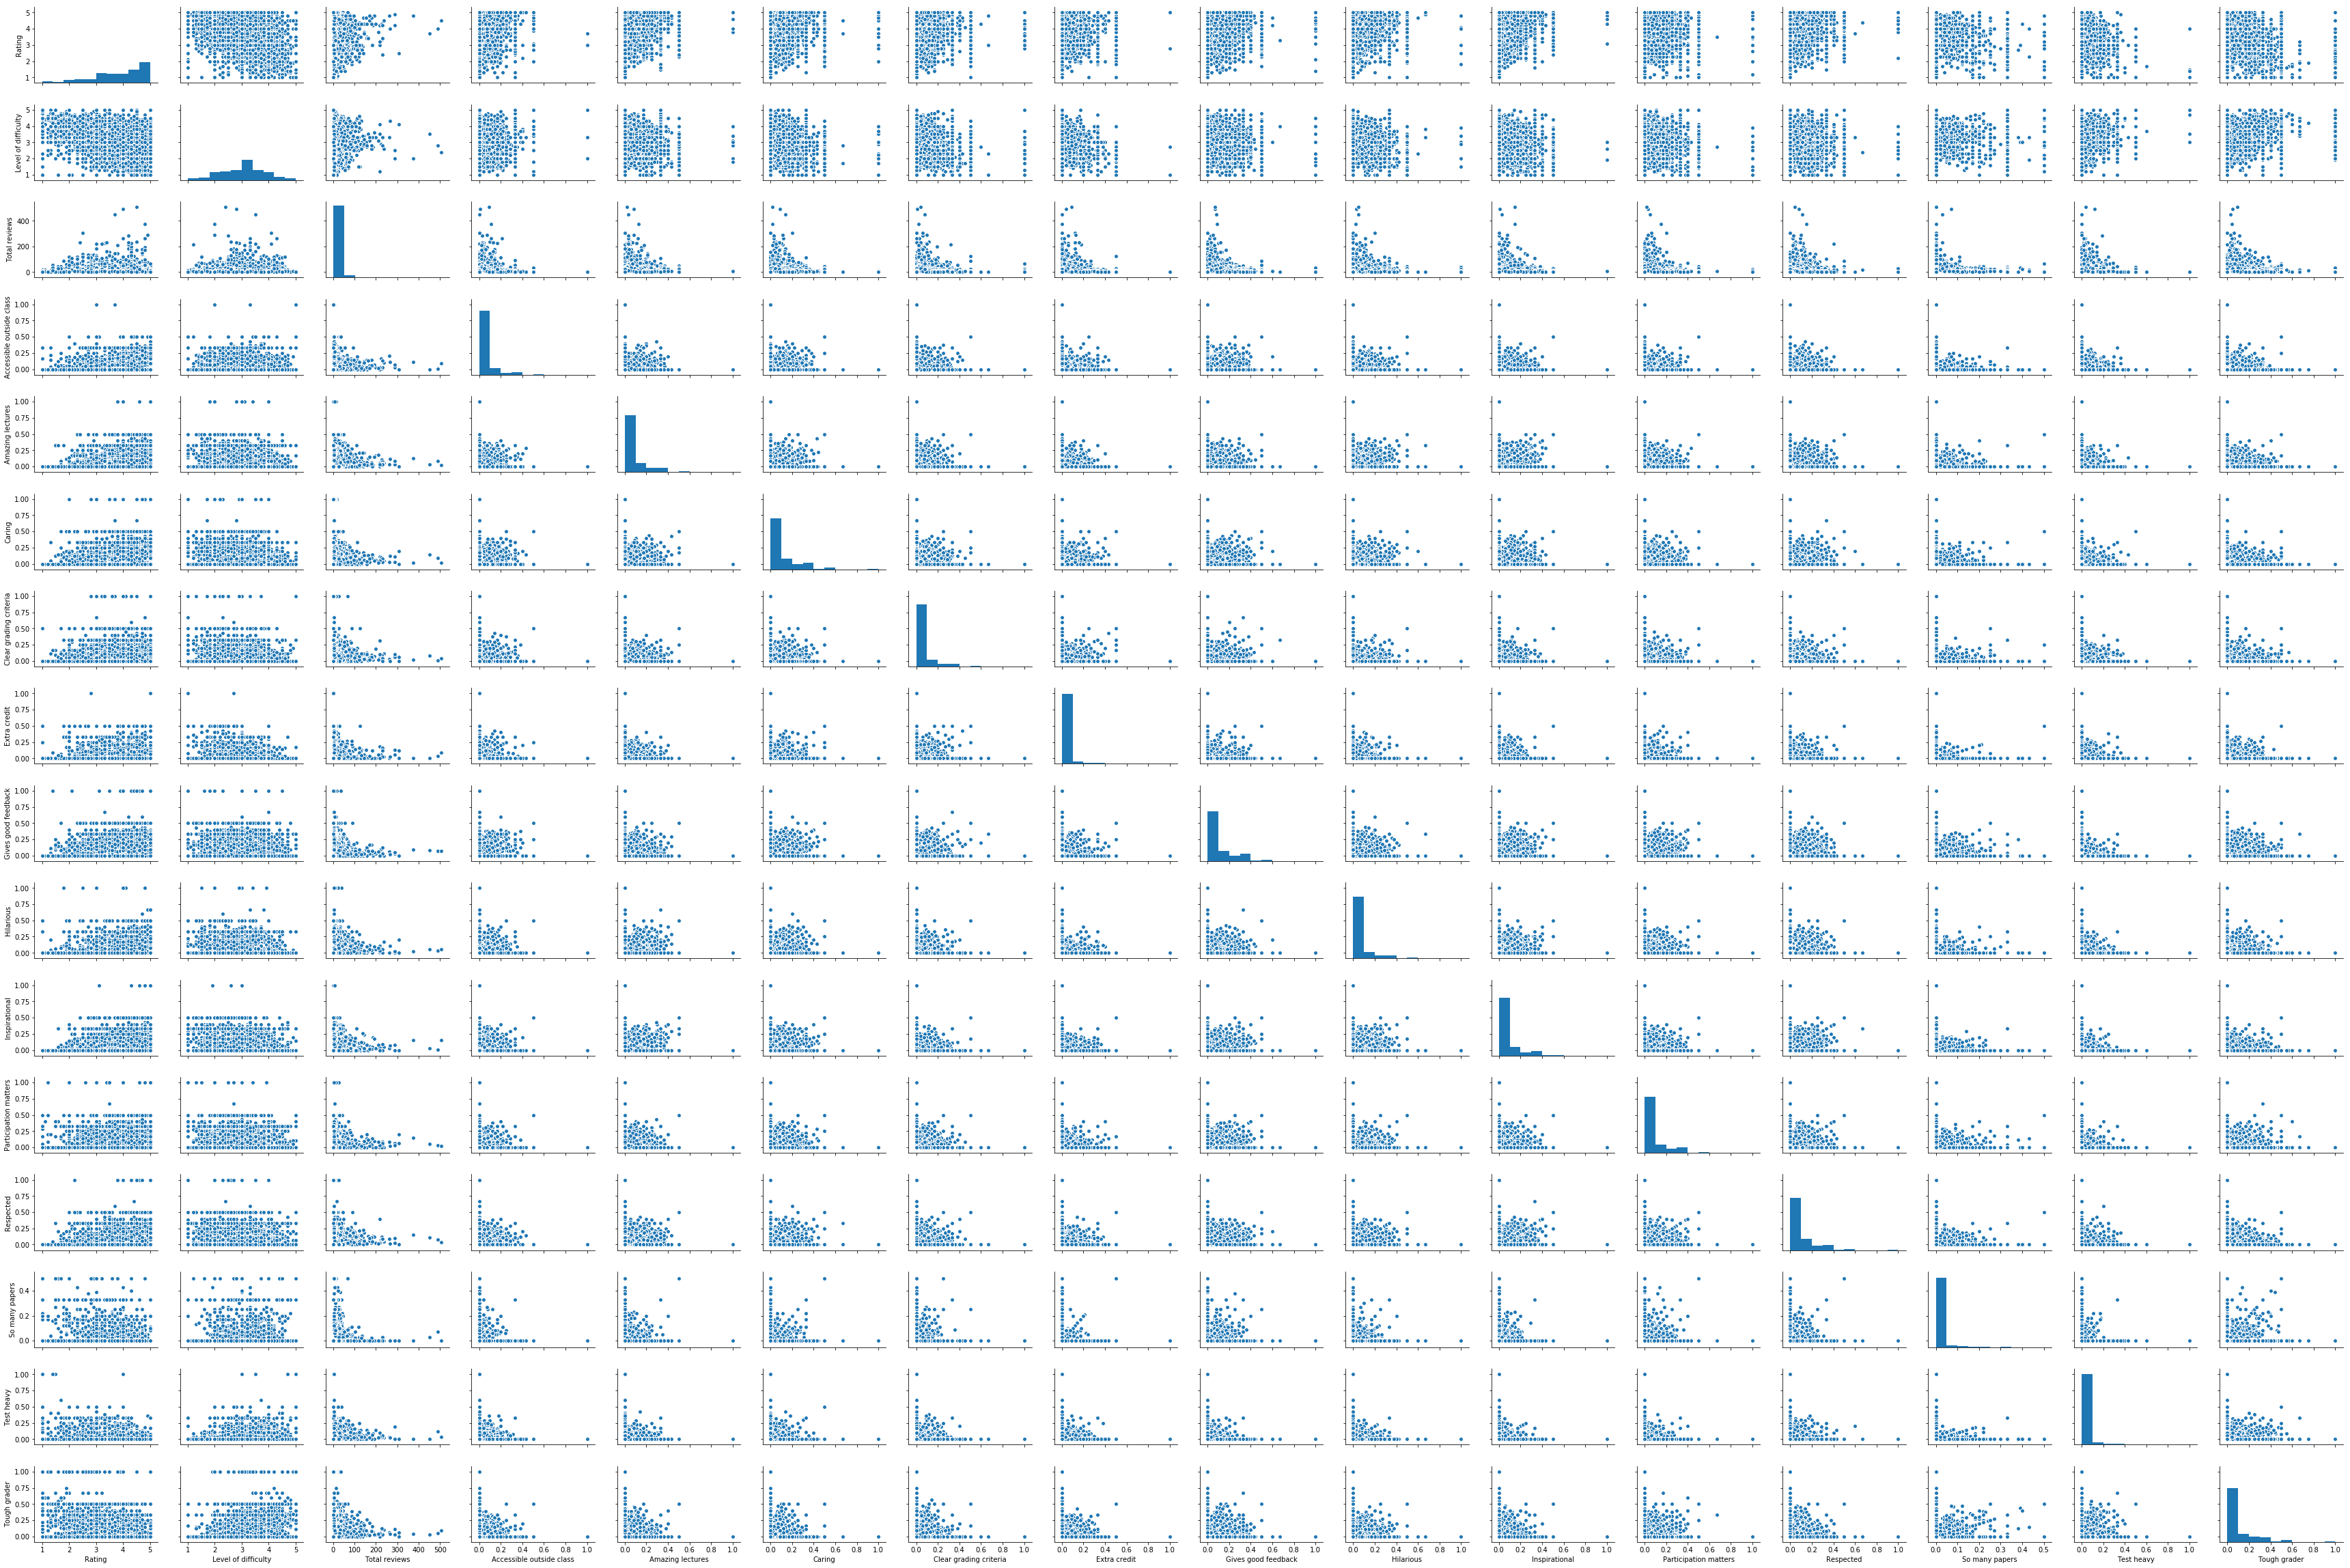

In [84]:
sns.pairplot(dfs_drill_down, size = 2, aspect=1.5);

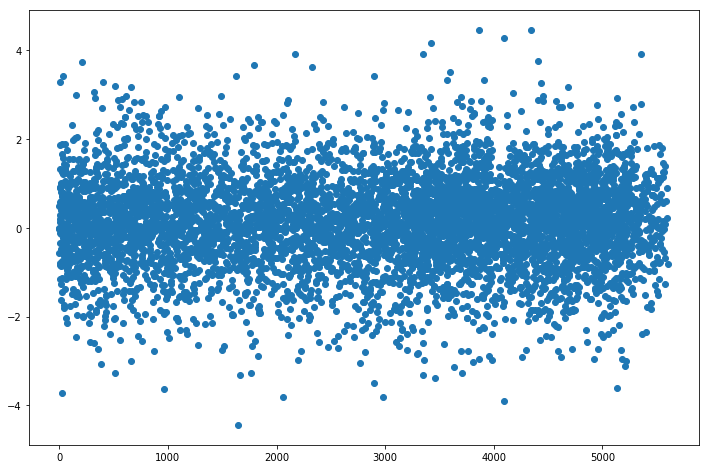

In [81]:
fit3.resid.plot(style='o', figsize=(12,8));

In [22]:
#diagnostic_plots.diagnostic_plots(df_drill_down.drop('rating', axis=1), df_drill_down['rating'], fit1)

In [83]:
lr=LinearRegression()
X=dfs_cleaned.iloc[:,2:]
y=dfs_cleaned.iloc[:,1]
lr.fit(X, y)
lr.score(X, y)


0.4422751981769201

In [86]:
from IPython.core.pylabtools import figsize

ValueError: x and y must be the same size

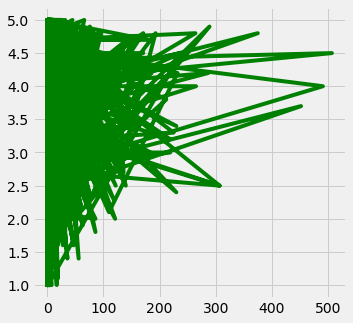

In [88]:

figsize(5,5)
plt.style.use('fivethirtyeight')

X = dfs_cleaned.iloc[:, 2:]

y = dfs_cleaned.iloc[:,1]

# x plot is random generated 100 number, and f(x_plot) is function transformation of x, and represents ground true
#. x is ran dome generated number, and y is function transformatoin with noise/error term

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(X, y, label='pattern', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [24]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    #ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y)
    #ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

ValueError: x and y must be the same size

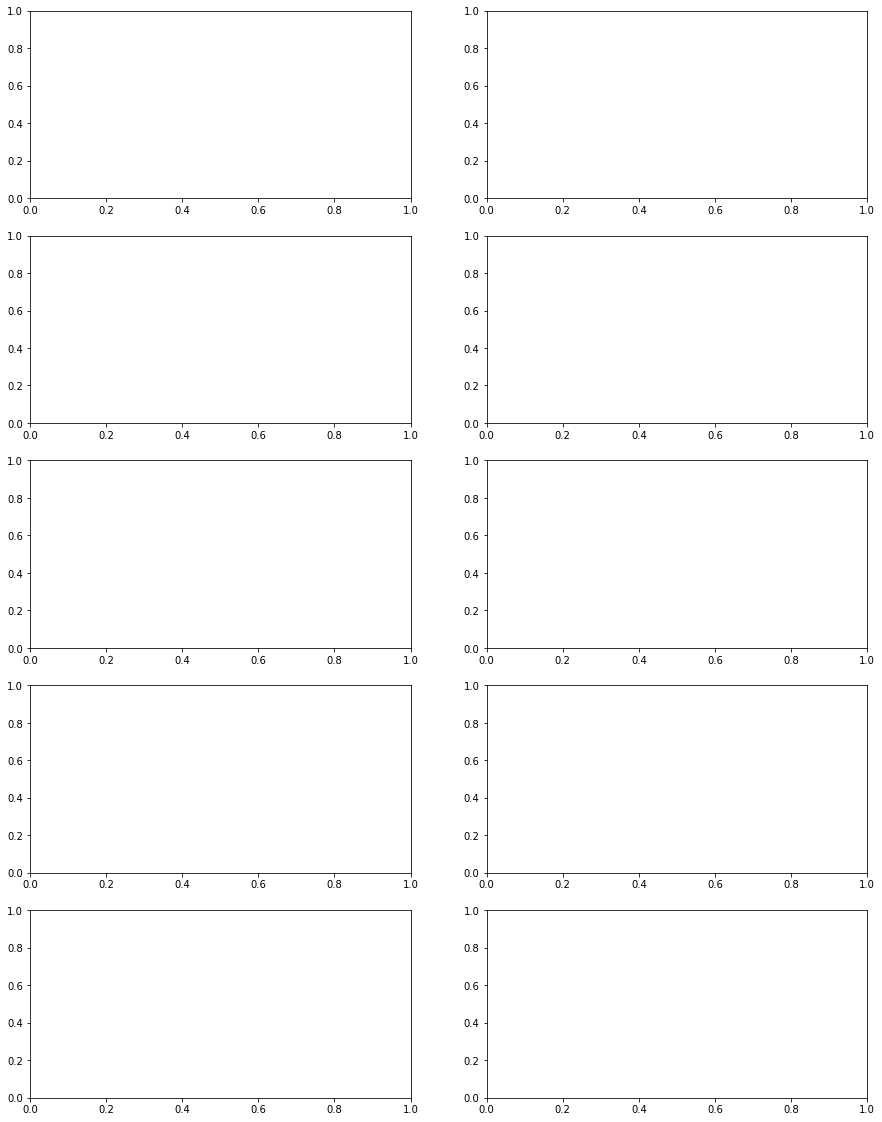

In [25]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(5, 2, figsize=(15, 20))
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

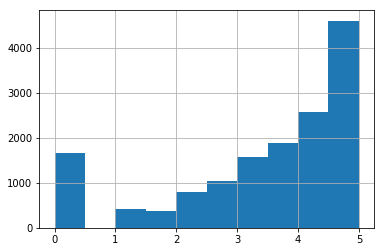

In [30]:
dfs['Rating'].hist()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c2191fd90> (for post_execute):


TypeError: cannot convert the series to <class 'float'>

TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

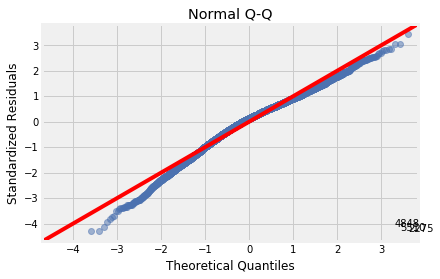

TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

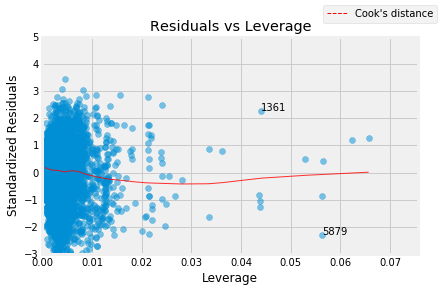

In [92]:
diagnostic_plots.diagnostic_plots(dfs_cleaned.drop(['Name','Rating'], axis=1), dfs_cleaned['Rating'], fit)